# In this assignment, we will continue working on image classification using TensorFlow.

• Download the intel image dataset from Kaggle.

• We will use the OpenCV image feature extraction library.
(conda install -c conda-forge opencv)

In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import accuracy_score

# Question 1: Download the data set, unzip and explore the file folders. Load the image dataset with training and testing grouped.

In [2]:
IMGSIZE = (128, 128)
CNAMES = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

X_train, y_train = [], []
for label in CNAMES:
    path = r'/Users/katieross/desktop/archive-5' + '/seg_train/seg_train/' + label
    for f in sorted([_ for _ in os.listdir(path) if _.lower().endswith('.jpg')]):
        X_train += [cv2.resize(cv2.imread(os.path.join(path,f)), IMGSIZE)] 
        y_train += [CNAMES.index(label)]

0


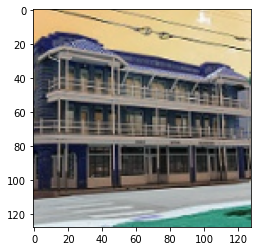

In [3]:
plt.imshow(X_train[2])
print(y_train[2])

2


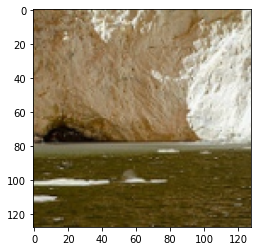

In [4]:
plt.imshow(X_train[6000])
print(y_train[6000])

3


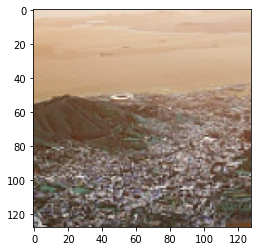

In [5]:
plt.imshow(X_train[8000])
print(y_train[8000])

In [6]:
IMGSIZE = (128, 128)
CNAMES = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

X_test, y_test = [], []
for label in CNAMES:
    path = r'/Users/katieross/desktop/archive-5' + '/seg_test/seg_test/' + label
    for f in sorted([_ for _ in os.listdir(path) if _.lower().endswith('.jpg')]):
        X_test += [cv2.resize(cv2.imread(os.path.join(path,f)), IMGSIZE)] 
        y_test += [CNAMES.index(label)]

0


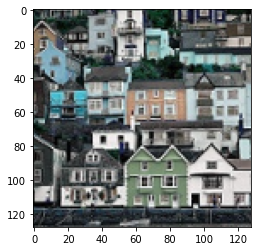

In [7]:
plt.imshow(X_test[100])
print(y_test[100])

0


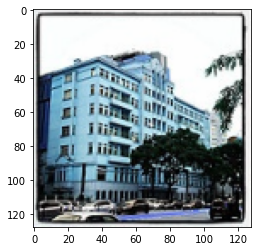

In [8]:
plt.imshow(X_test[50])
print(y_test[50])

# How many color channels are there?
There are 3 color channels r, b, g.

# Question 2: Convert the imageset to numpy array, such as the array size: (14034, 128, 128, 3) Scale the imageset to [0-1].

In [9]:
# Convert to numpy array
X_train = np.asarray(X_train)

In [10]:
print(X_train.shape)

(14034, 128, 128, 3)


In [11]:
# Scale the imageset
X_train = X_train/255

In [12]:
y_train = np.asarray(y_train)

In [13]:
# Convert to numpy array
X_test = np.asarray(X_test)

In [14]:
print(X_test.shape)

(3000, 128, 128, 3)


In [15]:
# Scale the imageset
X_test = X_test/255

In [16]:
y_test = np.asarray(y_test)

# Question 3: Create a convolutional neural network to train and report its performance on the testing portion of the dataset.

### Training

In [17]:
cnn = models.Sequential([
    # cnn
    layers.Conv2D(filters=32, activation='relu', kernel_size=(3,3), input_shape=(128,128,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=32, activation='relu', kernel_size=(3,3), input_shape=(128,128,3)),
    layers.MaxPooling2D((2,2)),
    
    # dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(6, activation='softmax')
    ])

2021-12-06 09:48:15.384846: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [18]:
cnn.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

In [19]:
cnn.fit(X_train, y_train, epochs=7)

2021-12-06 09:49:07.488160: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/7
439/439 [==============================] - 217s 487ms/step - loss: 1.0464 - accuracy: 0.5979
Epoch 2/7
439/439 [==============================] - 180s 411ms/step - loss: 0.7290 - accuracy: 0.7317
Epoch 3/7
439/439 [==============================] - 163s 372ms/step - loss: 0.5483 - accuracy: 0.8043
Epoch 4/7
439/439 [==============================] - 183s 417ms/step - loss: 0.3961 - accuracy: 0.8598
Epoch 5/7
439/439 [==============================] - 197s 449ms/step - loss: 0.2712 - accuracy: 0.9088
Epoch 6/7
439/439 [==============================] - 171s 388ms/step - loss: 0.1697 - accuracy: 0.9439
Epoch 7/7
439/439 [==============================] - 166s 379ms/step - loss: 0.1133 - accuracy: 0.9647


### Testing

In [20]:
y_pred = np.argmax(cnn.predict(X_test), axis=1)

In [21]:
acc = accuracy_score(y_test,y_pred)

In [22]:
acc

0.7543333333333333

# Question 4: Add regularization and/or drop-out features to your CNN. Report your model's best performance.

### Training

In [26]:
cnn = models.Sequential([
    # cnn
    layers.Conv2D(filters=32, activation='relu', kernel_size=(3,3), input_shape=(128,128,3)),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.2),
    layers.Conv2D(filters=32, activation='relu', kernel_size=(3,3), input_shape=(128,128,3)),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.2),
    
    # dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(6, activation='softmax')
    ])

In [27]:
cnn.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

In [28]:
cnn.fit(X_train, y_train, epochs=7)

Epoch 1/7
439/439 [==============================] - 238s 535ms/step - loss: 1.1071 - accuracy: 0.5758
Epoch 2/7
439/439 [==============================] - 201s 458ms/step - loss: 0.8083 - accuracy: 0.7010
Epoch 3/7
439/439 [==============================] - 193s 440ms/step - loss: 0.6243 - accuracy: 0.7742
Epoch 4/7
439/439 [==============================] - 183s 417ms/step - loss: 0.5066 - accuracy: 0.8141
Epoch 5/7
439/439 [==============================] - 180s 411ms/step - loss: 0.4147 - accuracy: 0.8512
Epoch 6/7
439/439 [==============================] - 191s 435ms/step - loss: 0.3370 - accuracy: 0.8755
Epoch 7/7
439/439 [==============================] - 194s 443ms/step - loss: 0.2796 - accuracy: 0.8975


### Testing

In [29]:
y_pred = np.argmax(cnn.predict(X_test), axis=1)

In [30]:
acc = accuracy_score(y_test,y_pred)

In [31]:
acc

0.8076666666666666

### Best Performance

Adding 3 drop out layers to the CNN increased the testing accuracy from 75.4% to 80.8%.  The reclassification accuracy decreased when dropout layers were added. This is because the original model was overfit.  Adding the dropout layers helped with this problem and ultimately gave the best performance.